## Regularized Linear Regression and Bias v.s. Variance

using ex5data1.mat

### 1.1 Visualizing the dataset

This dataset is divided into 3.

A training set:$X,y$

A cross validation set:$Xval,yval$

A test set:$Xtest,ytest$

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
dataSet=loadmat('ex5data1.mat')
dataSet

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

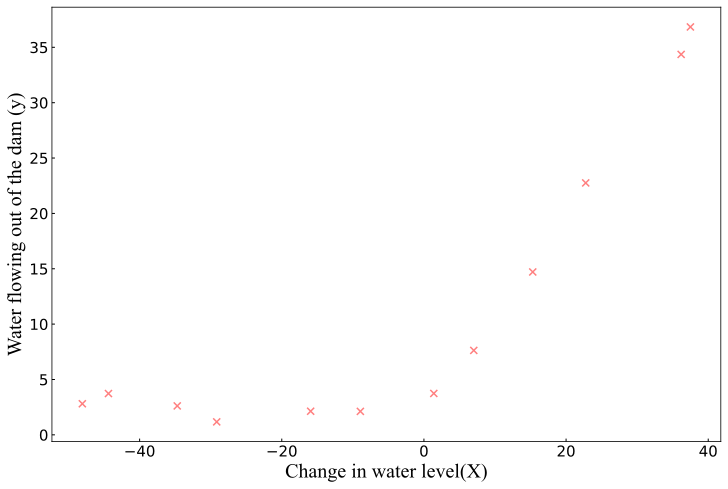

In [3]:
def plotData(dataSet):
    """
    :param dataSet:
    """
    X=dataSet['X']
    y=dataSet['y']
    
    font= {'family' : 'Times New Roman',
            'weight' : 'normal',
            'size'   : 20,
    }

    fig,ax=plt.subplots(figsize=(12,8))
    ax.tick_params(direction='in',width=1,length=3,color='black',labelsize=15)

    ax.scatter(X,y,c='r',marker='x',alpha=.5,s=50)
    ax.set_xlabel('Change in water level(X)',font)
    ax.set_ylabel('Water flowing out of the dam (y)',font)
    
plotData(dataSet)

### 1.2 Regularized linear regression cost function 

Recall that regularized linear regression cost function is defined as:

$J(\theta)=\frac{1}{2m}(\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2})+\frac{\lambda}{2m}(\sum_{j=1}^{n}\theta_{j}^{2})$

In [4]:
def cost(theta,X,y,C):
    """
    :param theta:
    :param X:
    :param y:
    :param C: Lambda
    """
    theta=np.mat(theta)
    X=np.mat(X)
    y=np.mat(y)
    
    m=X.shape[0]
    
    inner=np.power(X*theta.T-y,2).sum()
    reg=C/(2*m)*np.power(theta[:,1:],2).sum()
    
    return 1/(2*m)*inner+reg

In [5]:
X=dataSet['X']
X=np.insert(X,0,values=np.ones(1),axis=1)
y=dataSet['y']
theta=np.ones(X.shape[1])
C=1
X.shape,y.shape,theta.shape
cost(theta,X,y,C)

303.9931922202643

### 1.3 Regularized linear regression gradient 

Recall that regularized linear regression gradient is defined as:

$\frac{\partial J(\theta)}{\partial}=\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}$ for $j=0$

$\frac{\partial J(\theta)}{\partial}=(\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)})+\frac{\lambda}{m}\theta_{j}$ for $j \geq1$

In [6]:
def gradientRe(theta,X,y,C):
    """
    :param theta:
    :param X:
    :param y:
    :param C: Lambda
    """
    theta=np.mat(theta)
    X=np.mat(X)
    y=np.mat(y)
    
    m=X.shape[0]
    parameters=int(theta.ravel().shape[1])
    grad=np.mat(np.zeros(theta.shape))
    
    error=X*theta.T-y
        
    for j in range(parameters):
        term=np.multiply(error,X[:,j])
        
        if(j==0):
            grad[0,j]=np.sum(term)/m
        else:
            grad[0,j]=np.sum(term)/m+C/m*theta[:,j]
        
    return grad

In [7]:
gradientRe(theta,X,y,C)

matrix([[-15.30301567, 598.25074417]])

### 1.4 Fitting linear regression

In [8]:
from scipy.optimize import minimize

res = minimize(fun=cost,
                   x0=theta,
                   args=(X, y, C),
                   method='TNC',
                   jac=gradientRe,
                   options={'disp': True})

res

     fun: 22.379541822940315
     jac: matrix([[ 2.97621728e-07, -1.54084208e-08]])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 9
     nit: 4
  status: 1
 success: True
       x: array([13.08771447,  0.367742  ])

$J(\theta)=\theta_{0}+\theta_{1}X_{1}$

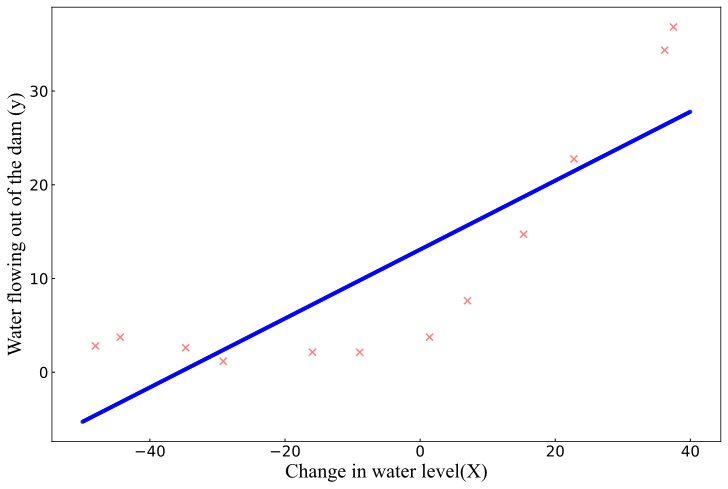

In [9]:
def plotDecisionBoundary(dataSet,res):
    """
    :param dataSet:
    """
    X=dataSet['X']
    y=dataSet['y']
    
    font= {'family' : 'Times New Roman',
            'weight' : 'normal',
            'size'   : 20,
    }
    
    XLR=np.linspace(-50,40,1000)
    yLR=res.x[0]+res.x[1]*XLR

    fig,ax=plt.subplots(figsize=(12,8))
    ax.tick_params(direction='in',width=1,length=3,color='black',labelsize=15)

    ax.scatter(XLR,yLR,c='blue',s=10,alpha=.5)
    ax.scatter(X,y,c='r',marker='x',alpha=.5,s=50)
    ax.set_xlabel('Change in water level(X)',font)
    ax.set_ylabel('Water flowing out of the dam (y)',font)
    
plotDecisionBoundary(dataSet,res)

## Bias-variance

Models with high bias are not complex enough for the data and tend to be underfit

Models with high variance tend to be overfit.

### 2.1 Learning curves

Recall that the training error for a dataset is defined as:

$J_{train}(\theta)=\frac{1}{2m}[\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}]$

In [10]:
def plotLearningCurves(dataSet):
    
    X=dataSet['X']
    X=np.insert(X,0,values=np.ones(1),axis=1)
    y=dataSet['y']
    Xval=dataSet['Xval']
    Xval=np.insert(Xval,0,values=np.ones(1),axis=1)
    yval=dataSet['yval']
    trainingCost=[]
    cvCost=[]
    m=X.shape[0]
    C=0
    theta=np.ones(X.shape[1])
    
    for i in range(1,m+1):
        res = minimize(fun=cost,
               x0=theta,
               args=(X[:i,:], y[:i], C),
               method='TNC',
               jac=gradientRe,
               options={'disp': True})
        tc=cost(res.x,X[:i,:],y[:i],C)
        cv=cost(res.x,Xval,yval,C)
        
        trainingCost.append(tc)
        cvCost.append(cv)
    

        
    font= {'family' : 'Times New Roman',
            'weight' : 'normal',
            'size'   : 20,
    }
    
    fig,ax=plt.subplots(figsize=(12,8))
    ax.set_title('Learning curve for linear regression',font)
    
    ax.tick_params(direction='in',width=1,length=3,color='black',labelsize=15)
    ax.plot(np.arange(1,m+1),trainingCost,label='Train',c='green',alpha=.5)
    ax.plot(np.arange(1,m+1),cvCost,label='Cross validation',alpha=.5)
    
    ax.set_xlabel('Number of training examples',font)
    ax.set_ylabel('Error',font)
    
    ax.legend(prop=font)
    plt.show()

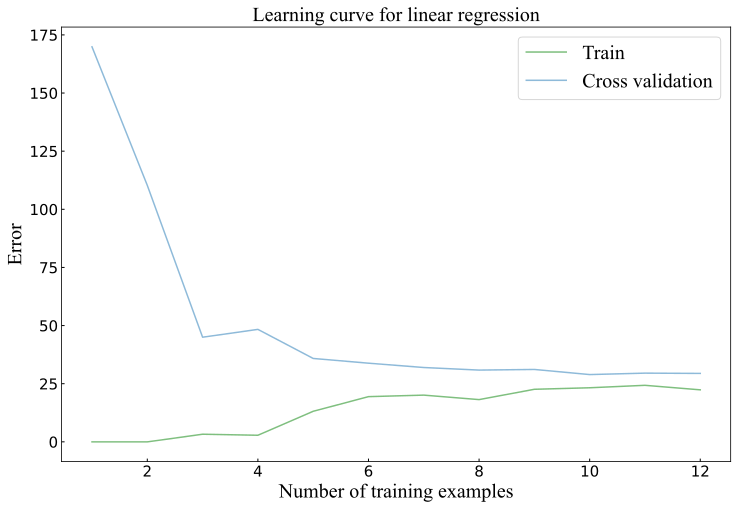

In [11]:
plotLearningCurves(dataSet)

## Polynomial regression

For use polynomial regression,our hypothesis has the form:
    
![ploynomial_regression](./polynomial_regression.png)

In [12]:
def polyFeature(x,power,as_ndarray=False):
    """
    :param x:
    :param power:
    """
    data = {'f{}'.format(i): np.power(x, i) for i in range(1, power + 1)}
    df = pd.DataFrame(data)

    return df.values if as_ndarray else df

In [13]:
 def loadPolyData():       
    dataSet = loadmat('ex5data1.mat')
    X,y,XVal,yVal,XTest,yTest=map(np.ravel,[dataSet['X'],dataSet['y'],dataSet['Xval'],dataSet['yval'],dataSet['Xtest'],dataSet['ytest']])
    
    return  X,y,XVal,yVal,XTest,yTest

In [14]:
X,y,XVal,yVal,XTest,yTest=loadPolyData()
polyFeature(X,3)

,f1,f2,f3
0,-15.936758,253.980260,-4047.621971
1,-29.152979,849.896197,-24777.006175
2,36.189549,1309.683430,47396.852168
3,37.492187,1405.664111,52701.422173
4,-48.058829,2309.651088,-110999.127750
5,-8.941458,79.949670,-714.866612
6,15.307793,234.328523,3587.052500
7,-34.706266,1204.524887,-41804.560890
8,1.389154,1.929750,2.680720
9,-44.383760,1969.918139,-87432.373590


### 3.1 Learning Polynomial Regression

In [15]:
def normalizeFeature(df):
    """
    :param df: DataFrame
    """
    return df.apply(lambda col:(col-col.mean())/col.std())

In [16]:
def preparePolyData(*args,power):
    def prepare(x):
        
        df=polyFeature(x,power=power)
        
        ndarr=normalizeFeature(df).values
        
        return np.insert(ndarr,0,np.ones(ndarr.shape[0]),axis=1)
    
    return [prepare(x) for x in args]

In [17]:
XPoly,XValPoly,XTestPoly=preparePolyData(X,XVal,XTest,power=8)

In [18]:
def plotLearningCurves(X,XPoly,y,XValPoly,yVal,C=0):
    trainingCost=[]
    cvCost=[]
    m=XPoly.shape[0]
    theta=np.ones(XPoly.shape[1])

    for i in range(1,m+1):
        res = minimize(fun=cost,
               x0=theta,
               args=(XPoly[:i,:], y[:i], C),
               method='TNC',
               jac=gradientRe,
               options={'disp': True})
        tc=cost(res.x,XPoly[:i,:],y[:i],C)
        cv=cost(res.x,XValPoly,yVal,C)
        trainingCost.append(tc)
        cvCost.append(cv)    
            
        
    font= {'family' : 'Times New Roman',
            'weight' : 'normal',
            'size'   : 20,
    }
    
    fig,ax=plt.subplots(2,1,figsize=(12,12))
    
    ax[0].tick_params(direction='in',width=1,length=3,color='black',labelsize=15)
    ax[1].tick_params(direction='in',width=1,length=3,color='black',labelsize=15)
    
    fitX=np.linspace(-50,50,100)
    fitXPoly=preparePolyData(fitX,power=8)
    fitX=np.max(fitX)
    resX = minimize(fun=cost,
               x0=theta,
               args=(XPoly,y, C),
               method='TNC',
               jac=gradientRe,
               options={'disp': True})
    
    fitY=np.dot(fitXPoly,resX.x.T)
    ax[0].plot(fitX,fitY,c='blue')
    ax[0].scatter(X,y,c='r',marker='x')
    ax[0].set_xlabel('Change in water level(x)',font)
    ax[0].set_ylabel('Water flowing out of the dam(y)',font)
                     
    ax[1].plot(np.arange(1,m+1),trainingCost,label='Train',c='green',alpha=.5)
    ax[1].plot(np.arange(1,m+1),cvCost,label='Cross validation',c='blue',alpha=.5)
    ax[1].legend(prop=font)

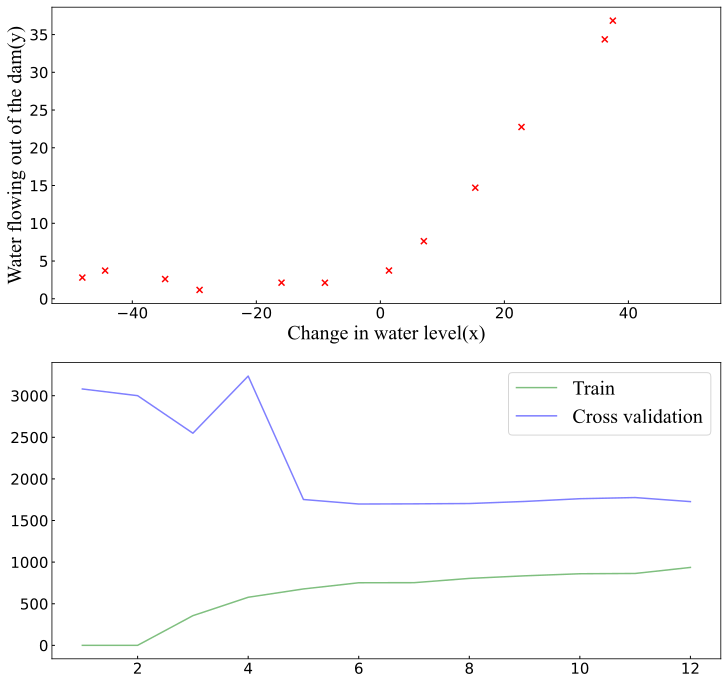

In [19]:
X,y,XVal,yVal,XTest,yTest=loadPolyData()
XPoly,XValPoly,XTestPoly=preparePolyData(X,XVal,XTest,power=8)
plotLearningCurves(X,XPoly,y,XValPoly,yVal,C=0)